# p03: Band-limited interpolation

We will interpolate following functions using band limited interpolation on an infinite grid.

**Delta function**
$$
v(x) = \begin{cases}
1, & x =0 \\
0, & \textrm{otherwise}
\end{cases}
$$

**Square wave**
$$
v(x) = \begin{cases}
1, & |x| \le 3 \\
0, & \textrm{otherwise}
\end{cases}
$$

**Hat function**
$$
v(x) = \max(0, 1-|x|/3)
$$

Since all functions are zero away from origin, we can restrict to some finite interval, say $[-10,10]$.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import arange,maximum,abs,zeros,sin,pi
from matplotlib.pyplot import subplot,figure,plot,grid,axis

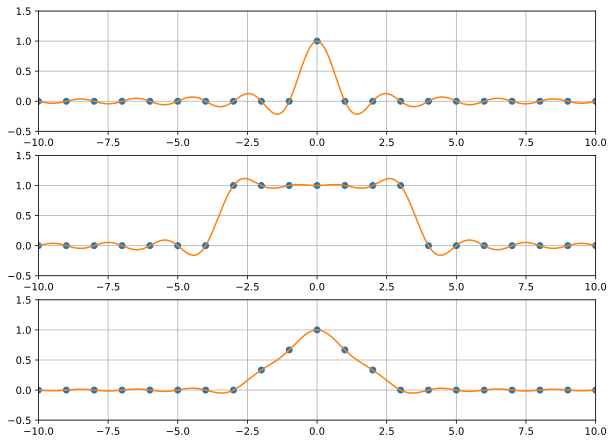

In [2]:
h = 1.0;
xmax = 10.0;
x = arange(-xmax,xmax+h,h)
xx = arange(-xmax-h/20, xmax+h/20, h/10) # for plotting
figure(figsize=(10,10))
for pl in range(3):
    subplot(4,1,pl+1)
    if pl==0:
        v = (x==0)                      # delta function
    elif pl==1:
        v = (abs(x) <= 3.0)             # square wave
    else:
        v = maximum(0.0,1.0-abs(x)/3.0) # hat function
    plot(x,v,'o'); grid(True)
    
    # Evaluate interpolant on xx
    p = zeros(len(xx))
    for i in range(len(x)):
        p = p + v[i]*sin(pi*(xx-x[i])/h)/(pi*(xx-x[i])/h)
    plot(xx,p)
    axis([-xmax,xmax,-0.5,1.5]);